In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Disable tensorflow debugging logs
import tensorflow as tf
import matplotlib.pyplot as plt

## Introducción a tensores

- Tensor

In [2]:
tensor = tf.constant(4)
tensor

<tf.Tensor: shape=(), dtype=int32, numpy=4>

- Vector

In [3]:
tensor = tf.constant([3, 4, 5])
tensor

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

- Obtener dimensión de tensor con __shape__

In [4]:
tensor.shape

TensorShape([3])

- Tensor de 2 dimensiones

In [5]:
tensor = tf.constant([[3, 4, 5], [3, 4, 5]])
tensor, tensor.shape

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 4, 5],
        [3, 4, 5]], dtype=int32)>,
 TensorShape([2, 3]))

- Ejercicio: Crear un tensor de $3 \times 3 \times 2 \times 1$

### Operaciones de tensores

In [6]:
tensor = tf.constant([[3, 4], [3, 4]])

In [7]:
tensor + tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[6, 8],
       [6, 8]], dtype=int32)>

In [8]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 9, 16],
       [ 9, 16]], dtype=int32)>

- Multiplicación de matrices con __@__

In [9]:
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[21, 28],
       [21, 28]], dtype=int32)>

### Métodos de tensores

- Inicialización en ceros. Pasar como argumento la dimensión del tensor

In [10]:
tensor = tf.zeros([3, 3, 9])
tensor.shape

TensorShape([3, 3, 9])

- Método __reshape__

In [11]:
tf.reshape(tensor, [9, 9])

<tf.Tensor: shape=(9, 9), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

- Cast de tensores

In [12]:
tf.cast(tensor, dtype=tf.uint8)

<tf.Tensor: shape=(3, 3, 9), dtype=uint8, numpy=
array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=uint8)>

- Método __range__

In [13]:
tf.range(4, 8)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 5, 6, 7], dtype=int32)>

### Cadenas en tensores

In [14]:
tf.constant(['Hola como estas'])

<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Hola como estas'], dtype=object)>

- Listas de cadenas

In [15]:
string = tf.constant(['Hola como estas',
                      'Bien y tu?',
                      'Que haciendo?'])

string[0], string[2]

(<tf.Tensor: shape=(), dtype=string, numpy=b'Hola como estas'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'Que haciendo?'>)

## Descargar dataset

In [16]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  7323k      0  0:00:11  0:00:11 --:--:-- 8172k


In [17]:
!ls aclImdb/train

labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


In [18]:
!ls aclImdb/test

labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt


## Preparar dataset

In [19]:
!rm -r aclImdb/train/unsup
!rm -r aclImdb/train/*.txt
!rm -r aclImdb/test/*.txt

In [20]:
train_paths = './aclImdb/train/*/*.txt'
test_paths = './aclImdb/train/*/*.txt'

train_files = tf.data.Dataset.list_files(train_paths)
test_files = tf.data.Dataset.list_files(test_paths)

def load_txt(filename):
    label = tf.strings.split(filename, sep='/')[3]
    raw_text = tf.io.read_file(filename)
    
    if label == 'pos':
        return raw_text, 1
    else:
        return raw_text, 0
    
raw_train_ds = train_files.map(load_txt) 
raw_test_ds = test_files.map(load_txt)  

for text, label in raw_train_ds.take(1):
    print(text, label)

tf.Tensor(b"I think Lion King 1 1/2 is one of the best sequels ever as if not the best out of the three Lion King movies! In the movie Timon and Pumbaa tell us where they came from and having trouble fitting in with others such as Timon having trouble digging tunnels with other Meercats! Timon and Pumbaa journey off into finding their dream place and find it and soon find it and also Simba who they raise but soon they must choose between their dream place or helping Simba face his evil Uncle Scar and proclaim his right as the Lion King of Pride Rock! Filled with wonderful new characters like Timon's Ma(Julie Kavner) and Uncle Max (Jerry Stiller). I think my favorite character was Uncle Max because he was very funney and was voiced by a funney comedian Jerry Stiller the father of Ben Stiller. Disney was smart to cast Stiller in that role! Filled with wonderful characters, animation, and story and music Lion King 1 1/2 is in my opinion the best of any sequel and better than Simba's Pride

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BUFFER_SIZE = tf.data.experimental.cardinality(raw_train_ds)
BUFFER_SIZE.numpy()

25000

In [22]:
batch_size = 16
voc_size = 5000
seq_length = 20

train_ds = raw_train_ds.shuffle(BUFFER_SIZE).batch(
        batch_size, num_parallel_calls=AUTOTUNE).prefetch(
        AUTOTUNE)

test_ds = raw_test_ds.batch(
        batch_size, num_parallel_calls=AUTOTUNE).prefetch(
        AUTOTUNE)

In [23]:
for text, label in train_ds.take(1):
    print(text.shape)

(16,)


## Definir modelo

In [24]:
from tensorflow.keras.layers import TextVectorization

In [25]:
def clean_text(raw_text):
    lowercase = tf.strings.lower(raw_text)
    clean = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return clean

vectorize_layer = TextVectorization(
    standardize=clean_text,
    max_tokens=voc_size,
    output_mode='int',
    output_sequence_length=seq_length)

- Adaptar la capa

In [26]:
vectorize_layer_ds = train_ds.map(lambda text, label: text)
vectorize_layer.adapt(vectorize_layer_ds)

In [35]:
vectorize_layer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 'i']

- Probar vectorize_layer con batch de prueba

In [36]:
test_batch = tf.constant([['Hi there']])
vectorize_layer(test_batch)

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[ 1, 48,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0]])>

<img src="../img/rnn.png" width="500"/>

__Imagen tomada de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.__

In [37]:
rnn = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=voc_size, output_dim=128),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(1)
])

- Probar rnn con batch de prueba

In [38]:
rnn(test_batch)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.39966172]], dtype=float32)>

- Información del modelo

In [39]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 20)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 20, 128)           640000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 673,025
Trainable params: 673,025
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento 

- Compilar modelo con oprimizador y función de pérdida

In [40]:
rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            optimizer='sgd',
            metrics=['accuracy'])

In [41]:
epochs = 3

In [42]:
history = rnn.fit(train_ds, 
                  validation_data=test_ds,
                  epochs=epochs)

Epoch 1/3
1563/1563 [==============================] - 19s 11ms/step - loss: 0.6911 - accuracy: 0.5034 - val_loss: 0.6768 - val_accuracy: 0.5045
Epoch 2/3
1563/1563 [==============================] - 18s 12ms/step - loss: 0.6741 - accuracy: 0.5367 - val_loss: 0.6510 - val_accuracy: 0.5710
Epoch 3/3
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6527 - accuracy: 0.5822 - val_loss: 0.6441 - val_accuracy: 0.6604


In [43]:
history.history

{'loss': [0.6910600066184998, 0.674085259437561, 0.652737021446228],
 'accuracy': [0.5034000277519226, 0.5366799831390381, 0.5821999907493591],
 'val_loss': [0.6768155694007874, 0.6509629487991333, 0.6440770030021667],
 'val_accuracy': [0.5045199990272522, 0.5709999799728394, 0.6603599786758423]}

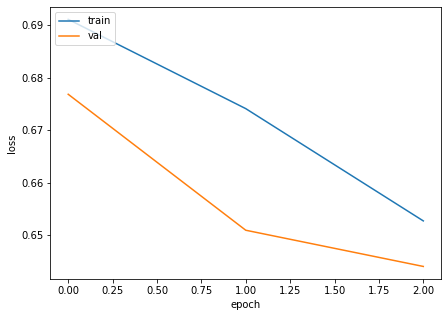

In [44]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

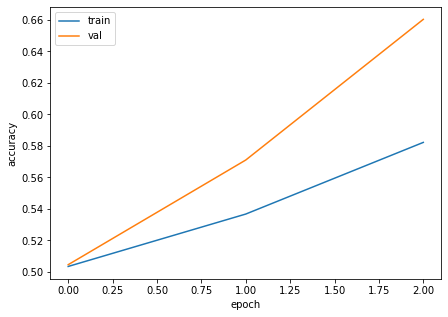

In [45]:
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Documentación tf.data https://www.tensorflow.org/guide/data